In [114]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np

In [115]:
def weight_histogram(product_name):

    # Specify the file path
    file_path = '../data/cleaned/generic_butcher_cleaned.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

    # Read the CSV file into a DataFrame
    df2 = pd.read_csv(file_path2)

    #Copied data to preserve original dataset
    product_data = df.loc[df["product_name"] == product_name]
    product=product_data.copy()
     
    #Adjust decimal point that were obvious errors
    # for index, row in product.iterrows():
    #     if row['measured_weight'] > 50:
    #        product.at[index, 'measured_weight'] *= 0.01
    product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)
        
    # product = product[["product_name","date_time","measured_weight"]]
    # drop_data = product.loc[product['measured_weight']>=50].index
    # product = product.drop(drop_data)
    
    #determine bin min and max in a readable format
    min_wt = np.min(product['measured_weight'])
    max_wt = np.max(product['measured_weight'])
    binmin = np.floor(min_wt)
    binmax = np.ceil(max_wt)

    #deterimined spec goal posts
    weight_min_spec = (df2.loc[df2['product_name']==product_name,'weight_min']).iloc[0]
    weight_max_spec = (df2.loc[df2['product_name']==product_name,'weight_max']).iloc[0]
    weight_avg = np.mean(product['measured_weight'])

    #created bins based on the quarter ounce
    num_bins = int((binmax-binmin)*(1/.25))

    #pulls measured weight data for the x value of the histogram
    #x is the measurment and the y is the count
    product = product['measured_weight']

    plt.figure(figsize=(10,6))
    plt.hist(product,bins=num_bins)
    plt.axvline(weight_avg, color="green", linewidth= 3)
    plt.axvline(weight_min_spec, color="red")
    plt.axvline(weight_max_spec, color="red")
    plt.title(product_name)
    plt.xlabel('Weight (oz)')
    plt.ylabel('Count')
    plt.show()

In [116]:
def height_histogram(product_name):
    # Specify the file path
    file_path = '../data/cleaned/generic_butcher_cleaned.csv'

    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    file_path2 = '../data/cleaned/generic_butcher_spec_cleaned.csv'

    # Read the CSV file into a DataFrame
    df2 = pd.read_csv(file_path2)

    #Copied data to preserve original dataset
    product_data = df.loc[df["product_name"] == product_name]
    product=product_data.copy()
     
    product['measured_weight'] = product['measured_weight'].apply(lambda x: x * 0.01 if x > 50 else x)

    #determine bin min and max in a readable format
    min_ht = np.min(product['measured_height'])
    max_ht = np.max(product['measured_height'])
    binmin = np.floor(min_ht)
    binmax = np.ceil(max_ht)

    #deterimined spec goal posts
    height_min_spec = (df2.loc[df2['product_name']==product_name,'thick_min']).iloc[0]
    height_max_spec = (df2.loc[df2['product_name']==product_name,'thick_max']).iloc[0]
    height_avg = np.mean(product['measured_height'])

    #created bins based on the quarter ounce
    num_bins = int((binmax-binmin)*(1/.1))

    #pulls measured weight data for the x value of the histogram
    #x is the measurment and the y is the count
    product = product['measured_height']

    plt.figure(figsize=(10,6))
    plt.hist(product,bins=num_bins)
    plt.axvline(height_avg, color="green", linewidth= 3)
    plt.axvline(height_min_spec, color="red")
    plt.axvline(height_max_spec, color="red")
    plt.title(product_name)
    plt.xlabel('Height (in)')
    plt.ylabel('Count')
    plt.show()

In [135]:
df.describe()

,measured_weight,measured_height
count,34356.000000,34356.000000
mean,9.597231,1.352706
std,20.511896,0.319378
min,3.000000,0.022862
25%,6.080000,1.168350
50%,8.020000,1.318550
75%,10.980000,1.464973
max,1762.000000,3.936430


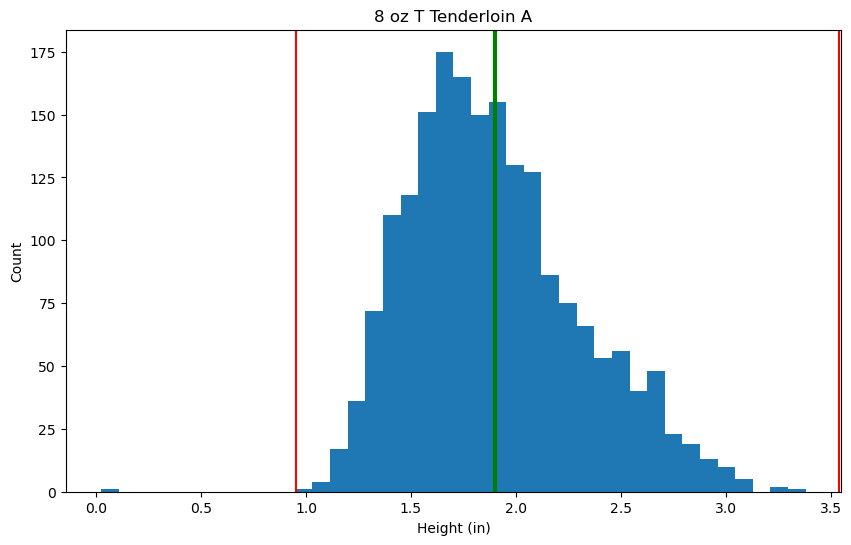

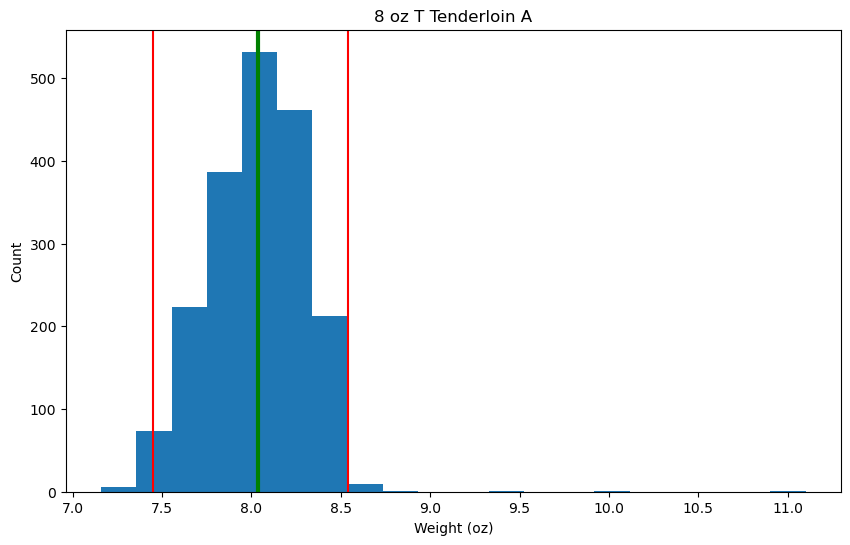

In [118]:
productName = "8 oz T Tenderloin A"
height_histogram(productName)
weight_histogram(productName)

In [131]:

df[(df['product_name']=='8 oz T Tenderloin A') & (df['measured_height']<.5)]

,product_name,date_time,measured_weight,measured_height
20373,8 oz T Tenderloin A,2024-06-19 06:48:03,8.12,0.023153


In [128]:

variable = df.groupby('product_name')['measured_height'].value_counts().reset_index().sort_values(by="measured_height").head(20)

In [130]:
variable.loc[variable["measured_height"]<.05].count()

product_name       20
measured_height    20
count              20
dtype: int64

In [35]:
df['product_name']

0        13 oz  Ribeye Tail A
1        13 oz  Ribeye Tail A
2        16 oz  Ribeye Tail A
3        16 oz  Ribeye Tail A
4        16 oz  Ribeye Tail A
                 ...         
34351        7 oz S Sirloin A
34352        7 oz S Sirloin A
34353        7 oz S Sirloin A
34354        7 oz S Sirloin A
34355        7 oz S Sirloin A
Name: product_name, Length: 34356, dtype: object

In [93]:

df2['product_name']

0             10 oz  Sirloin A
1             11 oz  Sirloin B
2             11 oz  Sirloin C
3         13 oz  Ribeye Tail A
4               16 oz  Strip A
5      16 oz  Dry Age Ribeye A
6         16 oz  Prime Strip A
7         16 oz  Ribeye Tail A
8              18 oz  Ribeye A
9        20 oz  Prime Ribeye A
10        22 oz  Porterhouse A
11        3.5 oz Tender Bits A
12    4 oz T Tenderloin Tail A
13            5 oz S Sirloin A
14            5 oz S Sirloin B
15            6 oz S Sirloin A
16            6 oz S Sirloin B
17         6 oz T Tenderloin A
18            7 oz S Sirloin A
19            7 oz S Sirloin B
20         7 oz T Tenderloin A
21          8 oz P Pork Chop A
22            8 oz S Sirloin A
23            8 oz S Sirloin B
24         8 oz T Tenderloin A
25            9 oz S Sirloin A
26         9 oz T Tenderloin A
Name: product_name, dtype: object